Submission Dicoding

Muhammad Ariq Naufal - ariiq48@gmail.com

In [1]:
# library deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# library untuk ekstrak zip file
import zipfile

# library visualisasi
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image
from google.colab import files
import matplotlib.image as mpimg

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-16 01:22:02--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  23.1MB/s    in 13s     

2020-10-16 01:22:15 (23.6 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# ekstrak zip file
local_zip = '/tmp/rockpaperscissors.zip'
# read 
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
data_augmentation = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.4
)

# data train
data_train = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    subset = 'training'
)

# data validation
data_valid = data_augmentation.flow_from_directory(
    base_dir,
    target_size = (150,150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# set max accuracy
max_val_acc = 0.96

In [10]:
# membuat kelas warning jika validation accuracy telah mencapai 96% stop
class warn(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if((logs.get('val_accuracy') > max_val_acc) and (logs.get('accuracy') > max_val_acc)):
			print("\nMax accuracy reached %2.2f%%, training stopped." %(max_val_acc*100))
			self.model.stop_training = True

callbacks = warn()

In [11]:
# fitting model
run_data = model.fit(
    data_train,
    steps_per_epoch=25,
    epochs=20,
    validation_data=data_valid,
    validation_steps=10,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 39s - loss: 1.1015 - accuracy: 0.3740 - val_loss: 0.9987 - val_accuracy: 0.3594
Epoch 2/20
25/25 - 38s - loss: 0.8283 - accuracy: 0.6455 - val_loss: 0.7673 - val_accuracy: 0.6906
Epoch 3/20
25/25 - 39s - loss: 0.5627 - accuracy: 0.7909 - val_loss: 0.3474 - val_accuracy: 0.8625
Epoch 4/20
25/25 - 40s - loss: 0.3086 - accuracy: 0.8950 - val_loss: 0.2988 - val_accuracy: 0.9031
Epoch 5/20
25/25 - 39s - loss: 0.2832 - accuracy: 0.9026 - val_loss: 0.2837 - val_accuracy: 0.9000
Epoch 6/20
25/25 - 40s - loss: 0.1968 - accuracy: 0.9350 - val_loss: 0.1946 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 39s - loss: 0.2030 - accuracy: 0.9286 - val_loss: 0.1599 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 39s - loss: 0.1651 - accuracy: 0.9442 - val_loss: 0.1978 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 39s - loss: 0.1455 - accuracy: 0.9429 - val_loss: 0.1434 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 39s - loss: 0.1624 - accuracy: 0.9468 - val_loss: 0.1334 - val_accuracy: 0.9656
Epoch 11/

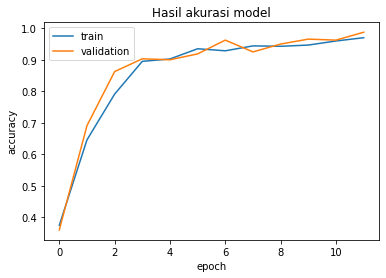

In [12]:
# visualisasi akurasi hasil dari training
plt.plot(run_data.history['accuracy'])
plt.plot(run_data.history['val_accuracy'])
plt.title('Hasil akurasi model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

In [13]:
# mencoba hasil model
def run():
  uploaded = files.upload()
  
  for fn in uploaded.keys():
    path = fn 
    img = image.load_img(path, target_size =(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=20)

    print(fn)
    print(classes)

    if classes[0][0] == 1:
      print('paper')
    elif classes[0][1] == 1:
      print('rock')
    else:
      print('scissors')

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ.png
04l5I8TqdzF9WDMJ.png
[[1. 0. 0.]]
paper


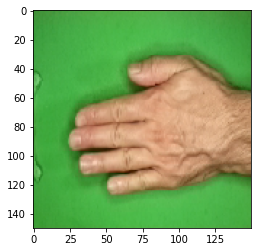

In [15]:
run()

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
[[0. 1. 0.]]
rock


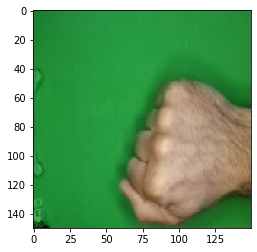

In [16]:
run()

Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png
1Io5Ksm3bqy87EAU.png
[[0. 0. 1.]]
scissors


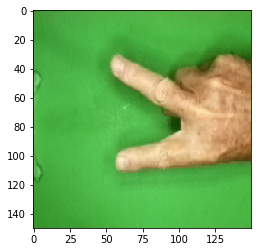

In [17]:
run()